In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
dota_df = pd.read_csv('dota.csv')

In [3]:
dota_df.head()

,match_id,duration,radiant_win,radiant_denies,radiant_runes,radiant_cosmetics,radiant_camps_stacked,radiant_last_hits,radiant_consumables,radiant_ability_used,...,avg_gold_adv_early,avg_xp_adv_early,radiant_kill_courier,dire_kill_courier,radiant_kill_rs,dire_kill_rs,radiant_aegis,dire_aegis,radiant_chat,dire_chat
0,7115636736,2347,False,55,14,18,9,759,33,597,...,246.5,289.6,1,1,0,1,0,1,28,19
1,7099875329,1383,False,5,1,5,2,304,16,402,...,-4111.9,-1667.3,0,3,0,1,0,1,23,21
2,7237632006,2117,False,48,24,6,12,865,32,1019,...,-345.7,-463.3,1,2,0,2,0,1,66,35
3,7230619656,1865,True,35,18,4,8,709,26,594,...,-647.1,-213.7,1,2,0,0,0,0,18,3
4,7221346319,1656,False,42,9,3,5,591,21,533,...,55.3,190.5,2,1,0,0,0,0,13,9


# Analysis questions

In [4]:
dota_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               10520 non-null  int64  
 1   duration               10520 non-null  int64  
 2   radiant_win            10520 non-null  bool   
 3   radiant_denies         10520 non-null  int64  
 4   radiant_runes          10520 non-null  int64  
 5   radiant_cosmetics      10520 non-null  int64  
 6   radiant_camps_stacked  10520 non-null  int64  
 7   radiant_last_hits      10520 non-null  int64  
 8   radiant_consumables    10520 non-null  int64  
 9   radiant_ability_used   10520 non-null  int64  
 10  radiant_obs            10520 non-null  int64  
 11  radiant_portal_used    10520 non-null  int64  
 12  radiant_fruit_plucked  10520 non-null  int64  
 13  radiant_lamp_used      10520 non-null  int64  
 14  radiant_sent           10520 non-null  int64  
 15  di

In [5]:
dota_df.describe()

,match_id,duration,radiant_denies,radiant_runes,radiant_cosmetics,radiant_camps_stacked,radiant_last_hits,radiant_consumables,radiant_ability_used,radiant_obs,...,avg_gold_adv_early,avg_xp_adv_early,radiant_kill_courier,dire_kill_courier,radiant_kill_rs,dire_kill_rs,radiant_aegis,dire_aegis,radiant_chat,dire_chat
count,1.052000e+04,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,...,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000,10520.000000
mean,7.138561e+09,2085.350190,35.460361,21.774620,11.149810,6.876521,865.986502,31.747433,816.123574,15.879278,...,-11.655135,26.833518,1.570817,1.435361,0.731084,0.679278,0.715589,0.665399,31.332605,31.136407
std,6.021923e+07,589.269695,13.621405,8.763579,7.369435,4.836195,354.762419,11.420440,672.277818,4.684785,...,1185.546493,861.783686,1.468277,1.427929,0.893738,0.857012,0.883511,0.847885,34.045058,33.207273
min,7.032774e+09,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-5373.000000,-4304.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.085469e+09,1687.750000,26.000000,16.000000,5.000000,3.000000,636.000000,24.000000,513.000000,13.000000,...,-783.750000,-526.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,10.000000
50%,7.138379e+09,1996.000000,34.000000,21.000000,12.000000,6.000000,814.000000,30.000000,681.000000,15.000000,...,0.000000,14.900000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000
75%,7.193131e+09,2393.000000,43.000000,27.000000,17.000000,9.000000,1039.000000,38.000000,918.000000,18.000000,...,759.583333,585.225000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,41.000000,41.000000
max,7.238633e+09,8199.000000,115.000000,116.000000,36.000000,34.000000,4372.000000,106.000000,14785.000000,62.000000,...,4960.300000,3627.400000,13.000000,23.000000,7.000000,5.000000,7.000000,5.000000,403.000000,454.000000


In [6]:
dota_df.radiant_win.value_counts()

radiant_win
False    5318
True     5202
Name: count, dtype: int64

In [7]:
dota_df.corr()

,match_id,duration,radiant_win,radiant_denies,radiant_runes,radiant_cosmetics,radiant_camps_stacked,radiant_last_hits,radiant_consumables,radiant_ability_used,...,avg_gold_adv_early,avg_xp_adv_early,radiant_kill_courier,dire_kill_courier,radiant_kill_rs,dire_kill_rs,radiant_aegis,dire_aegis,radiant_chat,dire_chat
match_id,1.000000,-0.025342,0.036632,-0.021578,0.198611,-0.023941,0.175275,0.089590,-0.060948,0.045658,...,0.024047,0.034350,0.015172,-0.029319,-0.071858,-0.048601,-0.066041,-0.041552,-0.007965,0.003609
duration,-0.025342,1.000000,0.015430,0.159637,0.644626,0.201316,0.272699,0.862144,0.469446,0.439524,...,0.008962,0.008379,0.227651,0.234602,0.506095,0.500413,0.497376,0.490179,0.193067,0.175100
radiant_win,0.036632,0.015430,1.000000,0.151160,0.343999,0.015163,0.084462,0.114694,0.115889,0.053266,...,0.331136,0.336325,0.064826,-0.070538,0.435035,-0.420776,0.440200,-0.424813,-0.092295,0.114379
radiant_denies,-0.021578,0.159637,0.151160,1.000000,0.240149,0.132626,0.099331,0.258643,0.209294,0.134758,...,0.385412,0.445575,0.071411,0.053283,0.211079,0.047439,0.209210,0.043621,-0.017279,0.051235
radiant_runes,0.198611,0.644626,0.343999,0.240149,1.000000,0.191003,0.295431,0.724311,0.402005,0.337367,...,0.302912,0.280298,0.255751,0.089060,0.554233,0.143610,0.552745,0.138286,0.073244,0.178561
radiant_cosmetics,-0.023941,0.201316,0.015163,0.132626,0.191003,1.000000,0.216541,0.273722,0.311819,0.184519,...,0.010461,0.000568,0.123568,0.107586,0.230635,0.217137,0.227865,0.213235,0.059831,0.076094
radiant_camps_stacked,0.175275,0.272699,0.084462,0.099331,0.295431,0.216541,1.000000,0.412646,0.217054,0.156359,...,0.079608,0.077843,0.096226,0.060386,0.213756,0.177334,0.214047,0.173910,0.026059,0.073594
radiant_last_hits,0.089590,0.862144,0.114694,0.258643,0.724311,0.273722,0.412646,1.000000,0.477127,0.436127,...,0.112502,0.122568,0.254800,0.214660,0.515758,0.454897,0.509920,0.444630,0.143523,0.175202
radiant_consumables,-0.060948,0.469446,0.115889,0.209294,0.402005,0.311819,0.217054,0.477127,1.000000,0.275547,...,0.112328,0.111292,0.167205,0.197458,0.416756,0.273625,0.410489,0.267922,0.179590,0.246768
radiant_ability_used,0.045658,0.439524,0.053266,0.134758,0.337367,0.184519,0.156359,0.436127,0.275547,1.000000,...,0.024195,0.040633,0.129317,0.110329,0.277791,0.227697,0.274957,0.223343,0.096496,0.166914


match_id:
Match id shouldnt be used in the analysis

Duration:
Duration doesn't seem to be that useful. Highly correlated with some things such as last hits, sentries, runes

In [8]:
dota_df_subset = dota_df[[
 'radiant_win',
 'radiant_denies',
 'radiant_runes',
 'radiant_cosmetics',
 'radiant_camps_stacked',
 'radiant_last_hits',
 'radiant_consumables',
 'radiant_ability_used',
 'radiant_obs',
 'radiant_portal_used',
 'radiant_fruit_plucked',
 'radiant_lamp_used',
 'radiant_sent',
 'dire_denies',
 'dire_runes',
 'dire_cosmetics',
 'dire_camps_stacked',
 'dire_last_hits',
 'dire_consumables',
 'dire_ability_used',
 'dire_obs',
 'dire_sent',
 'dire_portal_used',
 'dire_fruit_plucked',
 'dire_lamp_used',
 'avg_gold_adv_early',
 'avg_xp_adv_early',
 'radiant_kill_courier',
 'dire_kill_courier',
 'radiant_kill_rs',
 'dire_kill_rs',
 'radiant_aegis',
 'dire_aegis',
 'radiant_chat',
 'dire_chat']]

In [9]:
dota_df_subset.corr()

,radiant_win,radiant_denies,radiant_runes,radiant_cosmetics,radiant_camps_stacked,radiant_last_hits,radiant_consumables,radiant_ability_used,radiant_obs,radiant_portal_used,...,avg_gold_adv_early,avg_xp_adv_early,radiant_kill_courier,dire_kill_courier,radiant_kill_rs,dire_kill_rs,radiant_aegis,dire_aegis,radiant_chat,dire_chat
radiant_win,1.000000,0.151160,0.343999,0.015163,0.084462,0.114694,0.115889,0.053266,0.037379,0.117929,...,0.331136,0.336325,0.064826,-0.070538,0.435035,-0.420776,0.440200,-0.424813,-0.092295,0.114379
radiant_denies,0.151160,1.000000,0.240149,0.132626,0.099331,0.258643,0.209294,0.134758,0.233004,0.083602,...,0.385412,0.445575,0.071411,0.053283,0.211079,0.047439,0.209210,0.043621,-0.017279,0.051235
radiant_runes,0.343999,0.240149,1.000000,0.191003,0.295431,0.724311,0.402005,0.337367,0.674802,0.368703,...,0.302912,0.280298,0.255751,0.089060,0.554233,0.143610,0.552745,0.138286,0.073244,0.178561
radiant_cosmetics,0.015163,0.132626,0.191003,1.000000,0.216541,0.273722,0.311819,0.184519,0.253511,0.181092,...,0.010461,0.000568,0.123568,0.107586,0.230635,0.217137,0.227865,0.213235,0.059831,0.076094
radiant_camps_stacked,0.084462,0.099331,0.295431,0.216541,1.000000,0.412646,0.217054,0.156359,0.315059,0.198463,...,0.079608,0.077843,0.096226,0.060386,0.213756,0.177334,0.214047,0.173910,0.026059,0.073594
radiant_last_hits,0.114694,0.258643,0.724311,0.273722,0.412646,1.000000,0.477127,0.436127,0.882777,0.299195,...,0.112502,0.122568,0.254800,0.214660,0.515758,0.454897,0.509920,0.444630,0.143523,0.175202
radiant_consumables,0.115889,0.209294,0.402005,0.311819,0.217054,0.477127,1.000000,0.275547,0.554773,0.207302,...,0.112328,0.111292,0.167205,0.197458,0.416756,0.273625,0.410489,0.267922,0.179590,0.246768
radiant_ability_used,0.053266,0.134758,0.337367,0.184519,0.156359,0.436127,0.275547,1.000000,0.450490,0.156890,...,0.024195,0.040633,0.129317,0.110329,0.277791,0.227697,0.274957,0.223343,0.096496,0.166914
radiant_obs,0.037379,0.233004,0.674802,0.253511,0.315059,0.882777,0.554773,0.450490,1.000000,0.259937,...,0.015684,0.022161,0.248936,0.255217,0.524093,0.503107,0.515536,0.493143,0.206581,0.199095
radiant_portal_used,0.117929,0.083602,0.368703,0.181092,0.198463,0.299195,0.207302,0.156890,0.259937,1.000000,...,0.100347,0.106473,0.097956,0.062914,0.273520,0.072933,0.276092,0.071357,0.043254,0.091773


In [10]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

Something that is intuitive is that the correlation coefficient for radient winning is positive for radiant mini objectives such as last hits, roshan kills, aegis and negative for objectives for dires objectives. However, something that was interesting is that the correlation coefficient for radiant_win is negative with that of radiant_chat, and positive with dire_chat. This seems to suggest talking more on the chat seem to negatively reduce the chances of winning. 

<Axes: >

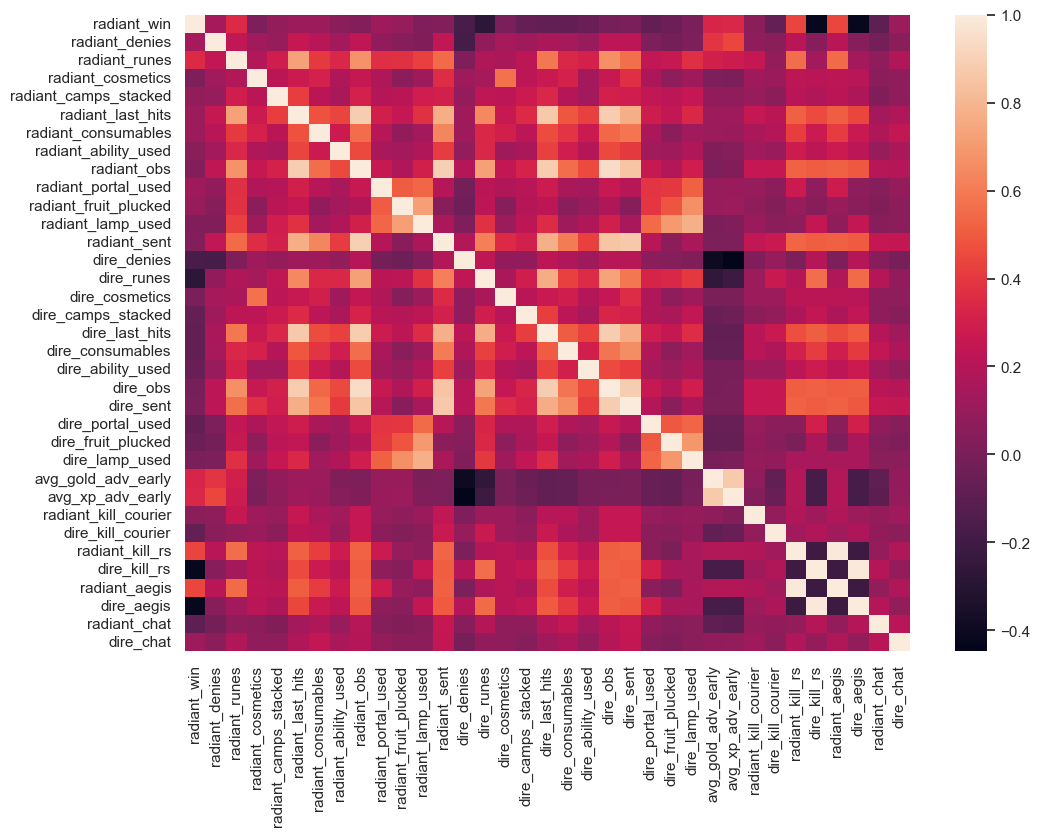

In [11]:
sns.set(font_scale=0.7)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(dota_df_subset.corr())

Some multicollinearity issues. 
For example, radiant obs is correlated with obs, last hits, sentry, lamp_used, runes for both teams as well. This is because as the duration increases, there will be more time for both teams to get last hits and buy observer wards. One possibility to deal with this is by using the difference in these mini objectives instead of the absolute number. 

Killing of roshan and taking of aegis is also very correlated. One variable should be used instead. 

The gold and exp advantage are also highly correlated. This can be combined to form a single varaible for early advantage.

This presents some multicllinearity issues.  


In [12]:
dota_df_subset['last_hit_difference'] = dota_df_subset['radiant_last_hits'] - dota_df_subset['dire_last_hits']
dota_df_subset['obs_difference'] = dota_df_subset['radiant_obs'] - dota_df_subset['dire_obs']
dota_df_subset['sent_difference'] = dota_df_subset['radiant_sent'] - dota_df_subset['dire_sent']
dota_df_subset['rune_difference'] = dota_df_subset['radiant_runes'] - dota_df_subset['dire_runes']
dota_df_subset['lamp_difference'] = dota_df_subset['radiant_lamp_used'] - dota_df_subset['dire_lamp_used']


C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_22212\1268583923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset['last_hit_difference'] = dota_df_subset['radiant_last_hits'] - dota_df_subset['dire_last_hits']


In [13]:
dota_df_subset_cleaned= dota_df_subset[[
    'radiant_win',
    'radiant_denies',
    'radiant_cosmetics',
    'radiant_camps_stacked',
    'radiant_consumables',
    'radiant_ability_used',
    'radiant_portal_used',
    'radiant_fruit_plucked',
    'dire_denies',
    'dire_cosmetics',
    'dire_camps_stacked',
    'dire_consumables',
    'dire_ability_used',
    'dire_portal_used',
    'dire_fruit_plucked',
    'avg_gold_adv_early',
    'avg_xp_adv_early',
    'radiant_kill_courier',
    'dire_kill_courier',
    'radiant_aegis',
    'dire_aegis',
    'radiant_chat',
    'last_hit_difference',
    'obs_difference',
    'sent_difference',
    'rune_difference',
    'lamp_difference',
    'dire_chat']]

In [14]:
dota_df_subset_cleaned

,radiant_win,radiant_denies,radiant_cosmetics,radiant_camps_stacked,radiant_consumables,radiant_ability_used,radiant_portal_used,radiant_fruit_plucked,dire_denies,dire_cosmetics,...,dire_kill_courier,radiant_aegis,dire_aegis,radiant_chat,last_hit_difference,obs_difference,sent_difference,rune_difference,lamp_difference,dire_chat
0,False,55,18,9,33,597,0,0,30,17,...,1,0,1,28,-236,0,1,-21,0,19
1,False,5,5,2,16,402,0,0,40,21,...,3,0,1,23,-135,1,3,-28,0,21
2,False,48,6,12,32,1019,3,2,31,11,...,2,0,1,66,-254,-2,-2,-5,11,35
3,True,35,4,8,26,594,0,7,24,2,...,2,0,0,18,-74,-1,-1,-10,4,3
4,False,42,3,5,21,533,0,7,32,6,...,1,0,0,13,-48,-1,-10,-18,-2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10515,False,22,2,4,46,774,0,0,31,0,...,4,1,1,65,-183,1,3,-6,0,32
10516,True,59,10,16,29,521,2,8,27,13,...,0,2,0,32,101,-2,-3,-2,-11,34
10517,True,44,10,7,35,529,0,0,29,10,...,0,1,0,47,100,-1,1,1,0,18
10518,True,26,15,2,20,541,0,0,54,24,...,0,1,0,26,-233,0,2,-11,0,9


<Axes: >

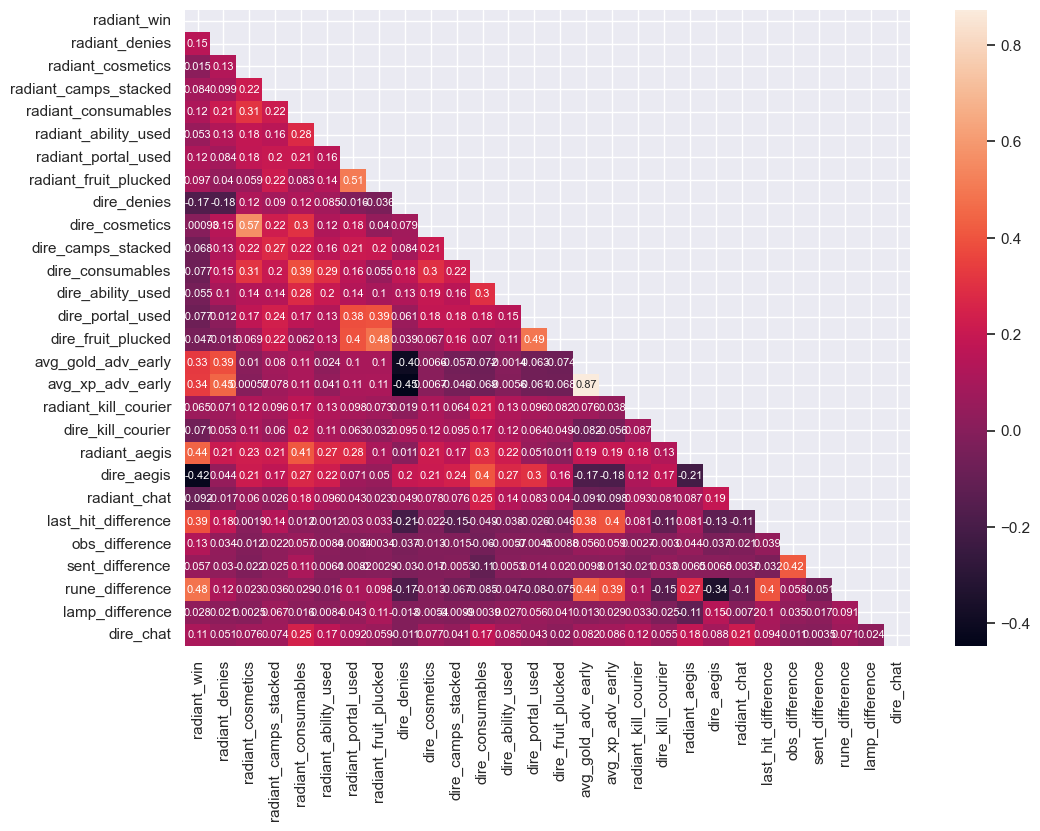

In [15]:
mask = np.triu(np.ones_like(dota_df_subset_cleaned.corr(), dtype=bool))
sns.heatmap(dota_df_subset_cleaned.corr(), annot= True, mask=mask, annot_kws={"size": 8})

### Try centering exp advantage

In [16]:
mean_gold = dota_df_subset_cleaned['avg_gold_adv_early'].mean()
mean_xp = dota_df_subset_cleaned['avg_xp_adv_early'].mean()

In [17]:
dota_df_subset_cleaned['avg_gold_adv_early_centered'] = dota_df_subset_cleaned['avg_gold_adv_early'] - mean_gold
dota_df_subset_cleaned['avg_xp_adv_early_centered'] = dota_df_subset_cleaned['avg_xp_adv_early'] - mean_gold

C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_22212\1053707583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned['avg_gold_adv_early_centered'] = dota_df_subset_cleaned['avg_gold_adv_early'] - mean_gold
C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_22212\1053707583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned['avg_xp_adv_early_centered'] = dota_df_subset_cleaned['avg_xp_adv_early'] - mean_gold


<Axes: >

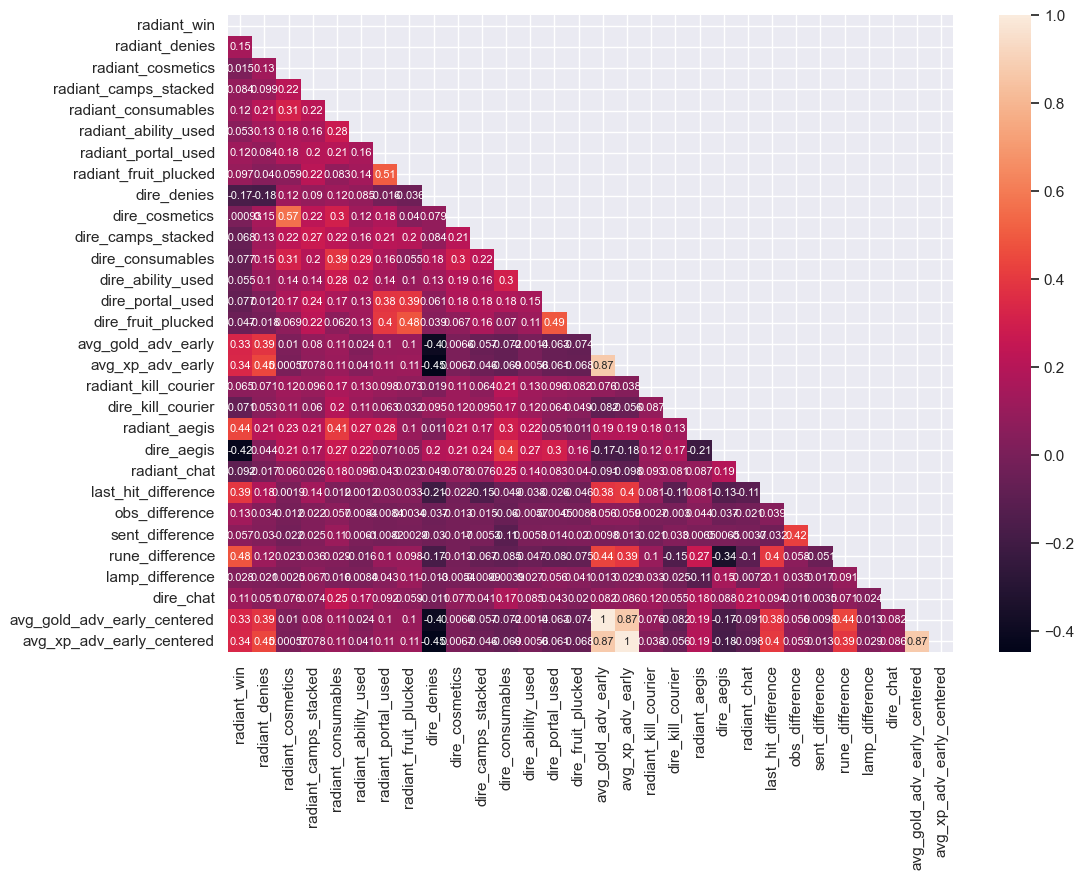

In [18]:
mask = np.triu(np.ones_like(dota_df_subset_cleaned.corr(), dtype=bool))
sns.heatmap(dota_df_subset_cleaned.corr(), annot= True, mask=mask, annot_kws={"size": 8})

Centering doesnt help in this case to reduce multicollinearity.

Drop the columns

In [19]:
dota_df_subset_cleaned.drop('avg_gold_adv_early_centered', axis='columns', inplace=True)
dota_df_subset_cleaned.drop('avg_xp_adv_early_centered', axis='columns', inplace = True)

C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_22212\3185270526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned.drop('avg_gold_adv_early_centered', axis='columns', inplace=True)
C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_22212\3185270526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned.drop('avg_xp_adv_early_centered', axis='columns', inplace = True)


In [20]:
dota_df_subset_cleaned['avg_adv'] = dota_df_subset_cleaned['avg_gold_adv_early'] + dota_df_subset_cleaned['avg_xp_adv_early']
dota_df_subset_cleaned.drop('avg_gold_adv_early', axis='columns', inplace=True)
dota_df_subset_cleaned.drop('avg_xp_adv_early', axis='columns', inplace = True)

C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_22212\388202558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned['avg_adv'] = dota_df_subset_cleaned['avg_gold_adv_early'] + dota_df_subset_cleaned['avg_xp_adv_early']
C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_22212\388202558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dota_df_subset_cleaned.drop('avg_gold_adv_early', axis='columns', inplace=True)
C:\Users\Ching Zheng Ing\AppData\Local\Temp\ipykernel_22212\388202558.py:3: SettingWithCopyWarning: 
A value is trying 

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
    
    X = dota_df_subset_cleaned[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [22]:
considered_features = ['radiant_denies', 'radiant_cosmetics',
       'radiant_camps_stacked', 'radiant_consumables', 'radiant_ability_used',
       'radiant_portal_used', 'radiant_fruit_plucked', 'dire_denies',
       'dire_cosmetics', 'dire_camps_stacked', 'dire_consumables',
       'dire_ability_used', 'dire_portal_used', 'dire_fruit_plucked',
       'avg_adv', 'radiant_kill_courier',
       'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat',
       'last_hit_difference', 'obs_difference', 'sent_difference',
       'rune_difference', 'lamp_difference', 'dire_chat']
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
18,dire_aegis,2.035295
17,radiant_aegis,1.964513
14,avg_adv,1.907804
6,radiant_fruit_plucked,1.666052
10,dire_consumables,1.660293
3,radiant_consumables,1.633999
13,dire_fruit_plucked,1.608860
1,radiant_cosmetics,1.606105
5,radiant_portal_used,1.601089
23,rune_difference,1.590798


# Exploratory data analysis

In [23]:
dota_df_subset_cleaned['radiant_win'].value_counts()

radiant_win
False    5318
True     5202
Name: count, dtype: int64

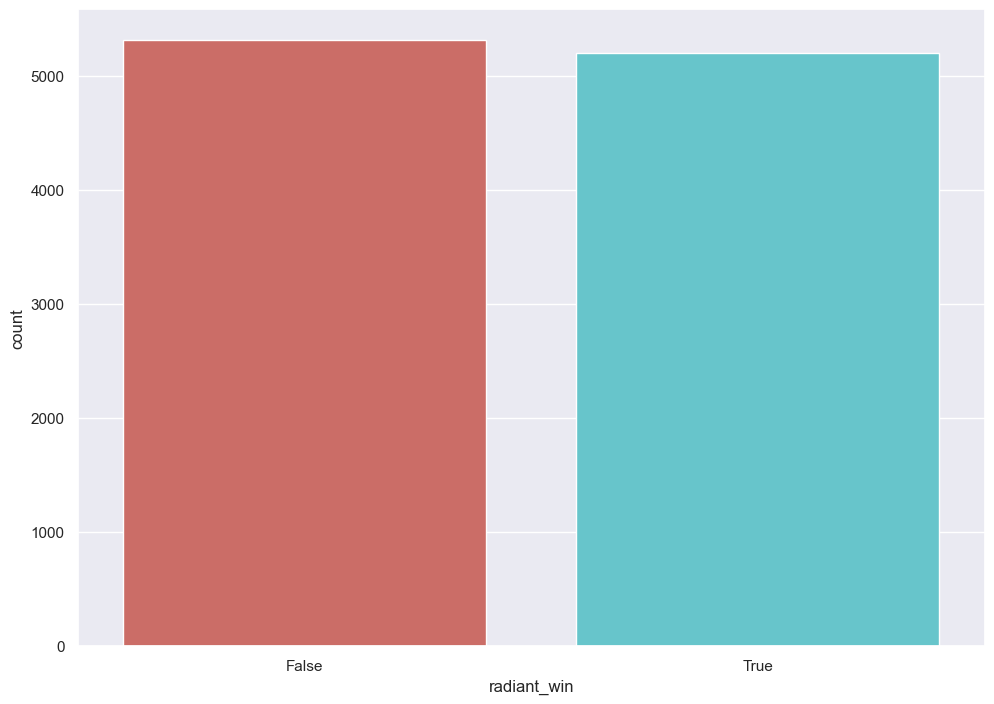

In [24]:
sns.countplot(x='radiant_win', palette='hls', data = dota_df_subset_cleaned)
plt.show()

In [25]:
dota_df_subset_cleaned.groupby('radiant_win').mean()

,radiant_denies,radiant_cosmetics,radiant_camps_stacked,radiant_consumables,radiant_ability_used,radiant_portal_used,radiant_fruit_plucked,dire_denies,dire_cosmetics,dire_camps_stacked,...,radiant_aegis,dire_aegis,radiant_chat,last_hit_difference,obs_difference,sent_difference,rune_difference,lamp_difference,dire_chat,avg_adv
radiant_win,,,,,,,,,,,,,,,,,,,,,
False,33.424032,11.039300,6.472546,30.438511,780.708349,2.270590,3.542309,37.692366,11.216059,7.846183,...,0.330951,1.021625,34.440203,-82.995487,-0.199699,-0.290335,-8.521249,0.489846,27.380030,-659.723076
True,37.542099,11.262784,7.289504,33.085544,852.328527,3.586697,4.388120,33.090927,11.202422,7.149942,...,1.108804,0.301230,28.155709,60.483083,0.230873,0.297578,2.668589,0.859477,34.976547,705.129549


### Testing to see if early advantage corresponds to win/lose

C:\anaconda3\envs\huggingface\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\envs\huggingface\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\envs\huggingface\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\envs\huggingface\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


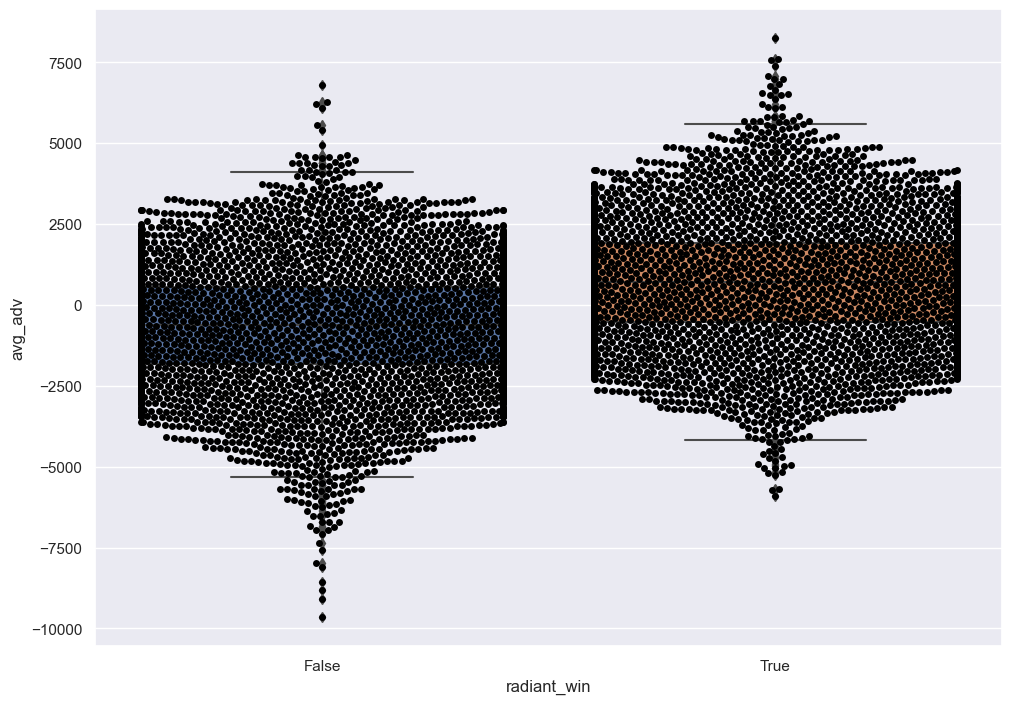

In [26]:
sns.boxplot( y="avg_adv", x='radiant_win', data=dota_df_subset_cleaned, )
sns.swarmplot( y="avg_adv", x='radiant_win', data=dota_df_subset_cleaned, color='black')
plt.show()

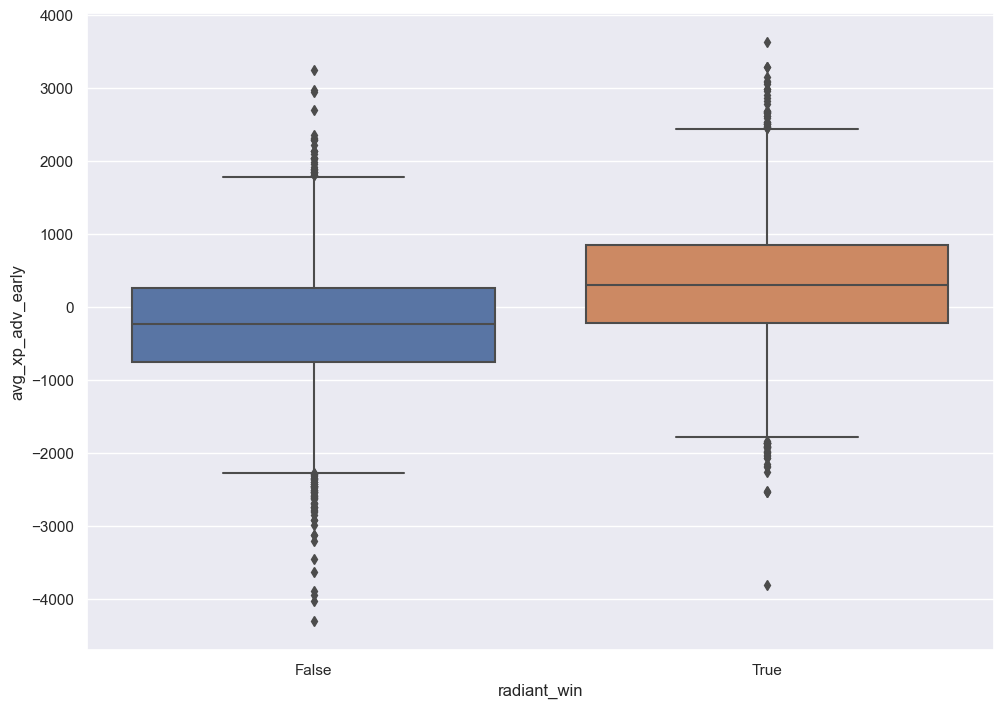

In [27]:
sns.boxplot( y="avg_xp_adv_early", x='radiant_win', data=dota_df, )
plt.show()

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [29]:
data_x = dota_df_subset_cleaned.drop('radiant_win', axis='columns')
data_y = dota_df_subset_cleaned['radiant_win']

In [30]:
data_x.columns

Index(['radiant_denies', 'radiant_cosmetics', 'radiant_camps_stacked',
       'radiant_consumables', 'radiant_ability_used', 'radiant_portal_used',
       'radiant_fruit_plucked', 'dire_denies', 'dire_cosmetics',
       'dire_camps_stacked', 'dire_consumables', 'dire_ability_used',
       'dire_portal_used', 'dire_fruit_plucked', 'radiant_kill_courier',
       'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat',
       'last_hit_difference', 'obs_difference', 'sent_difference',
       'rune_difference', 'lamp_difference', 'dire_chat', 'avg_adv'],
      dtype='object')

## Recursive Feature Elimination to choose variables

In [31]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select= 1)
rfe = rfe.fit(data_x, data_y)
print(rfe.support_)
print(rfe.ranking_)

C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False]
[22 23 17  8 25 11  7 18 15 16  9 24 10 13 19  5  1  2 20 12  3 21  4  6
 14 26]


In [32]:
df_important = pd.DataFrame()
df_important['variable'] = data_x.columns.values
df_important['rank'] = rfe.ranking_
df_important.sort_values(by= ['rank'])

,variable,rank
16,radiant_aegis,1
17,dire_aegis,2
20,obs_difference,3
22,rune_difference,4
15,dire_kill_courier,5
23,lamp_difference,6
6,radiant_fruit_plucked,7
3,radiant_consumables,8
10,dire_consumables,9
12,dire_portal_used,10


Ranking of importance for each variable

In [33]:
rfe = RFE(logreg, n_features_to_select= 20)
rfe = rfe.fit(data_x, data_y)
print(rfe.support_)
print(rfe.ranking_)

C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[False False  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True False  True  True
  True False]
[3 4 1 1 6 1 1 1 1 1 1 5 1 1 1 1 1 1 1 1 1 2 1 1 1 7]


C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [34]:
df_important = pd.DataFrame()
df_important['variable'] = data_x.columns.values
df_important['rank'] = rfe.ranking_
df_important.sort_values(by= ['rank'])

,variable,rank
12,dire_portal_used,1
18,radiant_chat,1
17,dire_aegis,1
16,radiant_aegis,1
15,dire_kill_courier,1
14,radiant_kill_courier,1
13,dire_fruit_plucked,1
24,dire_chat,1
19,last_hit_difference,1
10,dire_consumables,1


## Using all 26 vairables 

In [35]:
import statsmodels.api as sm
logit_model=sm.Logit(data_y,data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.379616
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE      
Dependent Variable:   radiant_win        Pseudo R-squared:   0.452    
Date:                 2023-10-02 13:37   AIC:                8039.1112
No. Observations:     10520              BIC:                8227.8981
Df Model:             25                 Log-Likelihood:     -3993.6  
Df Residuals:         10494              LL-Null:            -7291.3  
Converged:            1.0000             LLR p-value:        0.0000   
No. Iterations:       7.0000             Scale:              1.0000   
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
radiant_denies         0.0016   0.0022   0.7189 0.4722 -0.0027  0.0058
rad

The least important variables from RFE are sent_difference, radiant_denies, radiant_cosmetics, dire_ability_used, radiant_ability_used and avg_adv. By looking at the p values, we see that all except radiant_ability_used and dire_ability_used are shown to have p values of more than 0.05. This means that there is no significant evidence to show that the coefficients of these variables are significantly different from 0. 

We can also remove radiant_camps_stacked, radiant_portal_used, dire_cosemetics, dire_portal_used, dire_fruit_plucked, radiant_kill_courier.

The final chosen variables by looking at the p value are radiant_consumables, radiant_ability_used, radiant_fruit_plucked, dire_denies,dire_camps_stacked, dire_consumables, dire_ability_used, dire_kill_courier, radiant_aegis, dire_aegis, radiant_chat, last_hit_difference, obs_difference, rune_difference, lamp_difference, dire_chat.

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix_print = confusion_matrix(y_test, y_pred)
print(confusion_matrix_print)

[[1322  363]
 [ 331 1140]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.78      0.79      1685
        True       0.76      0.77      0.77      1471

    accuracy                           0.78      3156
   macro avg       0.78      0.78      0.78      3156
weighted avg       0.78      0.78      0.78      3156



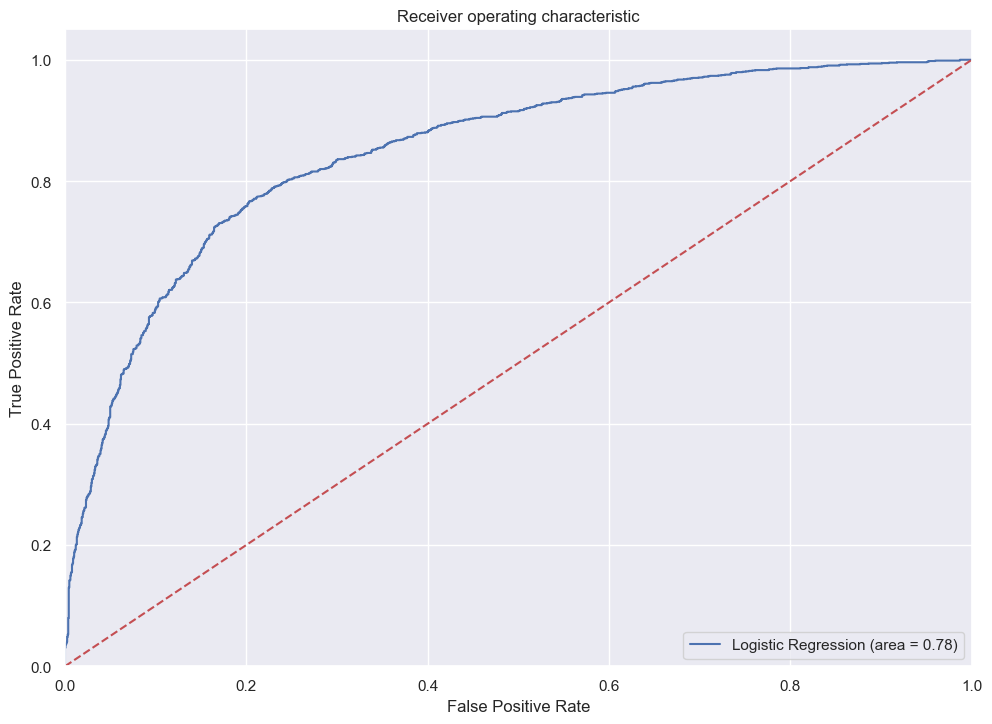

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Use varaibles chosen by RFE and p value

In [41]:
data_x_var = data_x[['radiant_consumables', 'radiant_ability_used', 'radiant_fruit_plucked', 'dire_denies','dire_camps_stacked', 'dire_consumables', 'dire_ability_used', 'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat', 'last_hit_difference', 'obs_difference', 'rune_difference', 'lamp_difference', 'dire_chat']]

# sent_difference
# radiant_denies
# radiant_cosmetics
# dire_ability_used
# radiant_ability_used
# avg_adv

In [42]:
data_x_var

,radiant_consumables,radiant_ability_used,radiant_fruit_plucked,dire_denies,dire_camps_stacked,dire_consumables,dire_ability_used,dire_kill_courier,radiant_aegis,dire_aegis,radiant_chat,last_hit_difference,obs_difference,rune_difference,lamp_difference,dire_chat
0,33,597,0,30,8,47,741,1,0,1,28,-236,0,-21,0,19
1,16,402,0,40,1,20,350,3,0,1,23,-135,1,-28,0,21
2,32,1019,2,31,18,34,582,2,0,1,66,-254,-2,-5,11,35
3,26,594,7,24,8,31,630,2,0,0,18,-74,-1,-10,4,3
4,21,533,7,32,1,22,411,1,0,0,13,-48,-1,-18,-2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10515,46,774,0,31,7,25,1213,4,1,1,65,-183,1,-6,0,32
10516,29,521,8,27,14,35,818,0,2,0,32,101,-2,-2,-11,34
10517,35,529,0,29,3,23,397,0,1,0,47,100,-1,1,0,18
10518,20,541,0,54,8,27,781,0,1,0,26,-233,0,-11,0,9


In [43]:
logit_model=sm.Logit(data_y,data_x_var)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.380109
         Iterations 7
                            Results: Logit
Model:                Logit              Method:             MLE      
Dependent Variable:   radiant_win        Pseudo R-squared:   0.452    
Date:                 2023-10-02 13:37   AIC:                8029.5037
No. Observations:     10520              BIC:                8145.6802
Df Model:             15                 Log-Likelihood:     -3998.8  
Df Residuals:         10504              LL-Null:            -7291.3  
Converged:            1.0000             LLR p-value:        0.0000   
No. Iterations:       7.0000             Scale:              1.0000   
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
radiant_consumables    0.0233   0.0029   7.9929 0.0000  0.0176  0.0290
rad

### Notes

For logistic regression, the fitted line is the log odds of an event happening. In other words, 

$$ log(odds) = intercept + \textbf{wX}$$
$$odds = e^{intercept + \textbf{wX}} \\ = e^{intercept}e^{\textbf{wX}} $$

All 16 variables are shown to have p values smaller than 0.05. This means that the coeffcients of the variables are significantly different from 0 at 95% level of significance. 

The coefficients mean that with every increase in the variable, the log odds of radiant winning will increase by that number. 

For a positive example, radiant_consumables have a coefficient of 0.0233. This means that with every unit increase in radiant_consumables, the log odds of radiant_win increases by 0.0233. This also means that the odds of radiant_win is e^0.0233 (1.024) times more. 

For a negative example, dire_denies have a coefficient of -0.0043. This means that with every unit increase in dire_denies, the log odds of radiant_win decreases by 0.0043. This also means that the odds of radiant_win is e^-0.043 (0.996) times less. 

Pseudo R-squared is 0.452, which means that the chosen variables can explain about 0.452 of the variance of the target variable, radient_win

In [44]:
#Using the same train_test

X_train_var = X_train[['radiant_consumables', 'radiant_ability_used', 'radiant_fruit_plucked', 'dire_denies','dire_camps_stacked', 'dire_consumables', 'dire_ability_used', 'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat', 'last_hit_difference', 'obs_difference', 'rune_difference', 'lamp_difference', 'dire_chat']]
X_test_var = X_test[['radiant_consumables', 'radiant_ability_used', 'radiant_fruit_plucked', 'dire_denies','dire_camps_stacked', 'dire_consumables', 'dire_ability_used', 'dire_kill_courier', 'radiant_aegis', 'dire_aegis', 'radiant_chat', 'last_hit_difference', 'obs_difference', 'rune_difference', 'lamp_difference', 'dire_chat']]
logreg_var = LogisticRegression()
logreg_var.fit(X_train_var, y_train)

C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_pred = logreg_var.predict(X_test_var)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_var.score(X_test_var, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix_print = confusion_matrix(y_test, y_pred)
print(confusion_matrix_print)

[[1354  331]
 [ 335 1136]]


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.80      0.80      1685
        True       0.77      0.77      0.77      1471

    accuracy                           0.79      3156
   macro avg       0.79      0.79      0.79      3156
weighted avg       0.79      0.79      0.79      3156



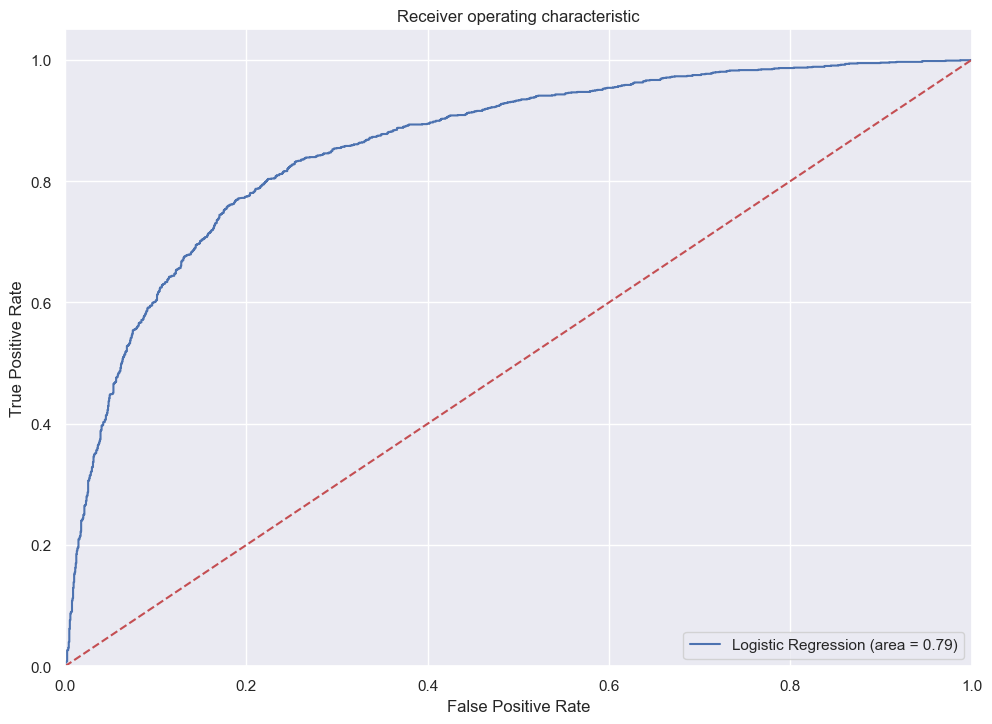

In [48]:
logit_roc_auc = roc_auc_score(y_test, logreg_var.predict(X_test_var))
fpr, tpr, thresholds = roc_curve(y_test, logreg_var.predict_proba(X_test_var)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Regularization

l2 regularization is applied by default. Can try l1, none and elasticnet

In [49]:
logreg_var_l1 = LogisticRegression(penalty='l1', solver='liblinear')
logreg_var_l1.fit(X_train_var, y_train)
y_pred_l1 = logreg_var_l1.predict(X_test_var)
print('Accuracy of logistic regression classifier with l1 regularizer on test set: {:.2f}'.format(logreg_var_l1.score(X_test_var, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_l1)
print(confusion_matrix_print)

Accuracy of logistic regression classifier with l1 regularizer on test set: 0.84
[[1415  270]
 [ 221 1250]]


In [50]:
logreg_var_none = LogisticRegression(penalty=None)
logreg_var_none.fit(X_train_var, y_train)
y_pred_none = logreg_var_none.predict(X_test_var)
print('Accuracy of logistic regression classifier with no regularizer on test set: {:.2f}'.format(logreg_var_none.score(X_test_var, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_none)
print(confusion_matrix_print)

Accuracy of logistic regression classifier with no regularizer on test set: 0.78
[[1342  343]
 [ 339 1132]]


C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


L1 regularizer seems to be the most accurate

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.80      0.80      1685
        True       0.77      0.77      0.77      1471

    accuracy                           0.79      3156
   macro avg       0.79      0.79      0.79      3156
weighted avg       0.79      0.79      0.79      3156



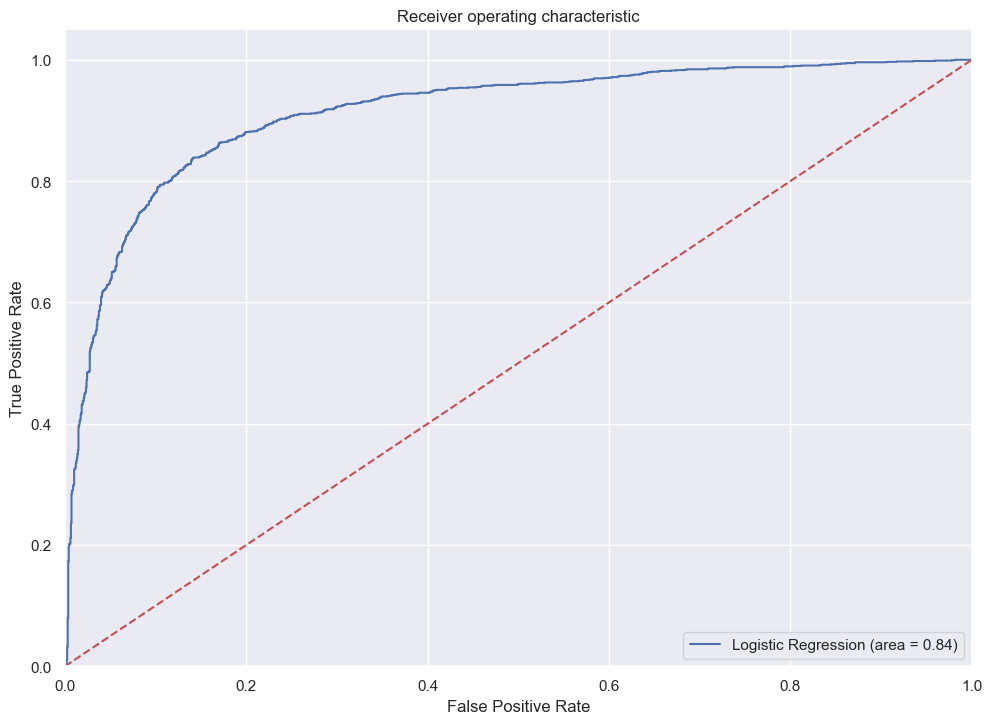

In [52]:
logit_roc_auc = roc_auc_score(y_test, logreg_var_l1.predict(X_test_var))
fpr, tpr, thresholds = roc_curve(y_test, logreg_var_l1.predict_proba(X_test_var)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Trees

In [53]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

[Text(0.5235543026634506, 0.975, 'x[16] <= 0.5\ngini = 0.5\nsamples = 7364\nvalue = [3633, 3731]'),
 Text(0.28999278670004885, 0.925, 'x[22] <= -0.5\ngini = 0.398\nsamples = 3776\nvalue = [2742, 1034]'),
 Text(0.1684941632063182, 0.875, 'x[17] <= 0.5\ngini = 0.245\nsamples = 2626\nvalue = [2250, 376]'),
 Text(0.08346564077511806, 0.825, 'x[19] <= -6.5\ngini = 0.418\nsamples = 912\nvalue = [641, 271]'),
 Text(0.042053411496498945, 0.775, 'x[4] <= 509.5\ngini = 0.271\nsamples = 618\nvalue = [518, 100]'),
 Text(0.02011073115127829, 0.725, 'x[1] <= 1.5\ngini = 0.13\nsamples = 329\nvalue = [306, 23]'),
 Text(0.007653476632470282, 0.675, 'x[20] <= -6.0\ngini = 0.274\nsamples = 110\nvalue = [92, 18]'),
 Text(0.0026054388536069046, 0.625, 'x[11] <= 325.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.0013027194268034523, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0039081582804103565, 0.575, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.012701514411333659, 0.625, 'x

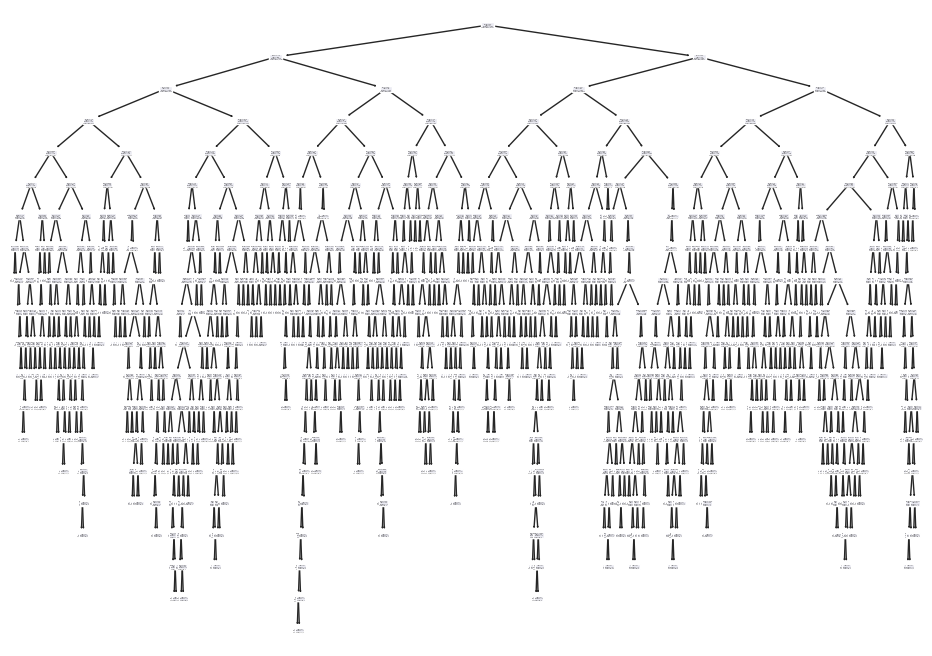

In [54]:
tree.plot_tree(clf)

In [55]:
print('Accuracy of tree classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_tree))

Accuracy of tree classifier on test set: 0.81
[[1376  309]
 [ 301 1170]]
              precision    recall  f1-score   support

       False       0.82      0.82      0.82      1685
        True       0.79      0.80      0.79      1471

    accuracy                           0.81      3156
   macro avg       0.81      0.81      0.81      3156
weighted avg       0.81      0.81      0.81      3156



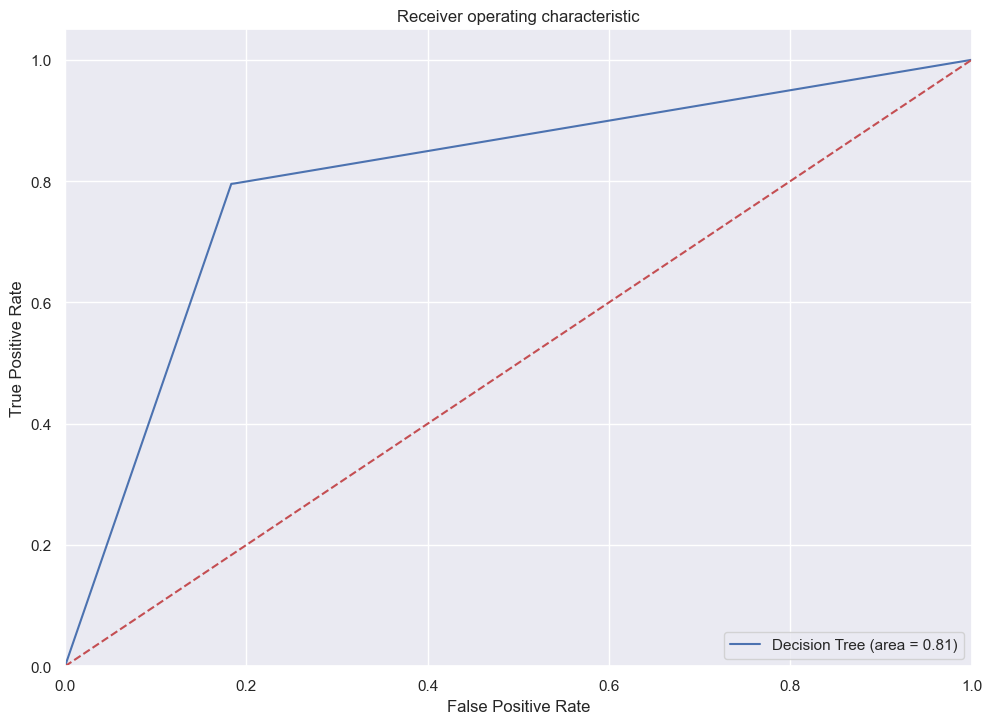

In [56]:
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Random Forest

Step 1) Create bootstrap data, i.e select subset of all data(can select the same entry more than once)<br />
Step 2) Create a decision tree using the bootstrapped dataset, but only use a random subset of variables at each step. E.g for root node, consider only two variables and select between them.<br />
Step 3) Build multiple tree using step 1 and 2<br />
Step 4) Once we get a new data, run the data through all the trees.<br /> 

Note Bootstrapping data and using the aggregate to make a deicsion is called "Bagging"

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf_random = RandomForestClassifier(max_depth=2, random_state=0)
clf_random.fit(X_train, y_train)
y_pred_tree = clf_random.predict(X_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(clf_random.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_tree))

Accuracy of Random Forest on test set: 0.83
[[1361  324]
 [ 223 1248]]
              precision    recall  f1-score   support

       False       0.86      0.81      0.83      1685
        True       0.79      0.85      0.82      1471

    accuracy                           0.83      3156
   macro avg       0.83      0.83      0.83      3156
weighted avg       0.83      0.83      0.83      3156



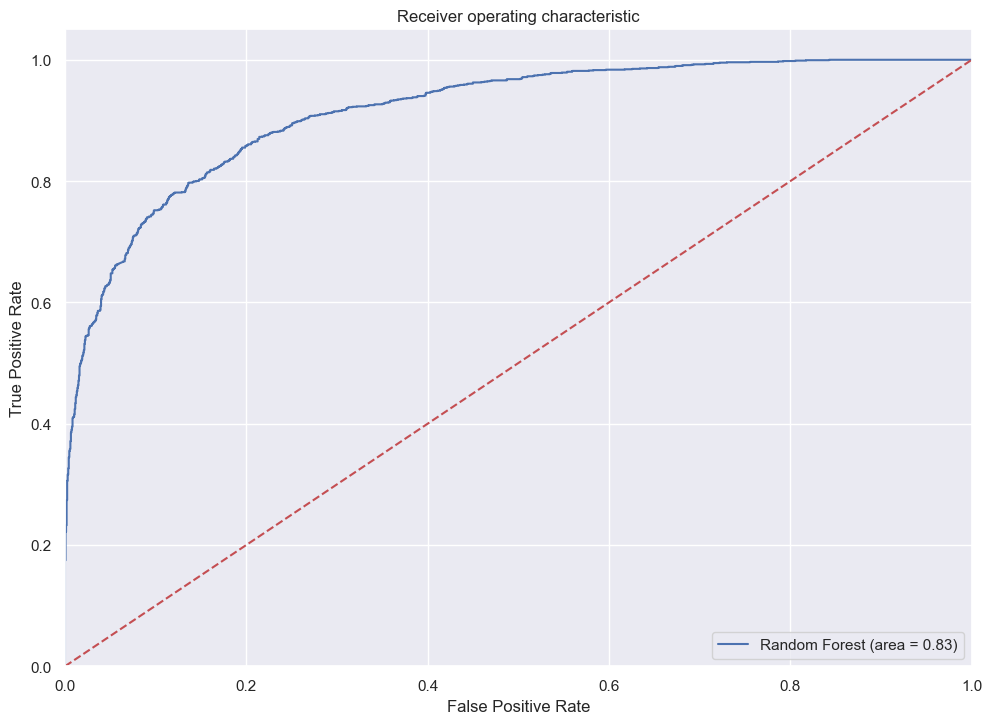

In [58]:
logit_roc_auc = roc_auc_score(y_test, clf_random.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_random.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## AdaBoost

Step 1) Create weights that are equal for each sample. <br />
Step 2) Using weighted gini index, compare best variable to classify and create a stump for the best variable chosen (Stump is a tree that has one node and two leaves)<br />
Step 3) Determine amount of say for this classifier. <br />Note: Total Error for a stump is the sum of the wieghts assosciated with the incorrectly classified samples $$\text{Amount of Say} = \frac{1}{2}log\frac{1-Total Error}{Total Error}$$ <br />
Step 4) Update sample weights. <br />Incorrectly classified samples are given this new sample weight. 
$$\text{New Sample Weight} = \text{sample weight} \times e^{\text{amount of say}}$$
Correctly classified samples are given this new sample weight. 
$$\text{New Sample Weight} = \text{sample weight} \times e^{-\text{amount of say}}$$
Step 5) Normalize new sample weights
Step 6) Create the second stump using the updated sample weights (Step 2 onwards)
Step 7) Given a new data, put the data through the forest of stumps. Combine the amount of say for both sides. The number that is bigger will be the where the data is classfied in

In [59]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada = AdaBoostClassifier(random_state=0)
clf_ada.fit(X_train, y_train)
y_pred_tree = clf_ada.predict(X_test)
print('Accuracy of AdaBoost on test set: {:.2f}'.format(clf_ada.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_tree))

Accuracy of AdaBoost on test set: 0.85
[[1429  256]
 [ 220 1251]]
              precision    recall  f1-score   support

       False       0.87      0.85      0.86      1685
        True       0.83      0.85      0.84      1471

    accuracy                           0.85      3156
   macro avg       0.85      0.85      0.85      3156
weighted avg       0.85      0.85      0.85      3156



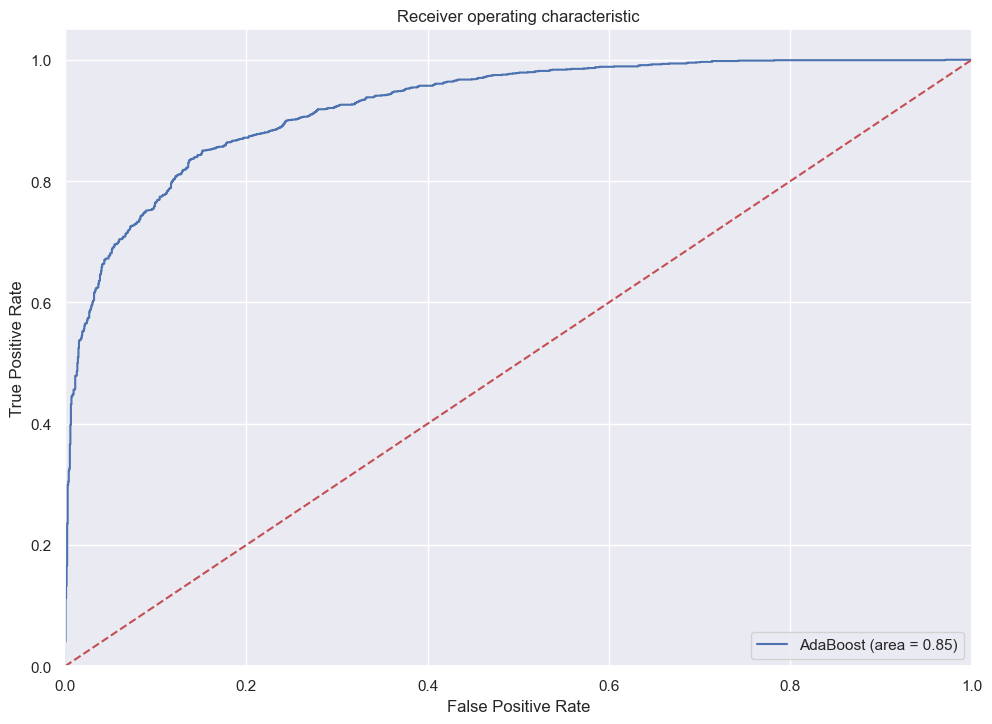

In [60]:
logit_roc_auc = roc_auc_score(y_test, clf_ada.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_ada.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

# Neural Network

In [61]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1, max_iter = 1000)
clf_nn.fit(X_train, y_train)
y_pred_nn = clf_nn.predict(X_test)
print('Accuracy of Neural Network on test set: {:.2f}'.format(clf_nn.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_nn)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_nn))

Accuracy of Neural Network on test set: 0.78
[[1324  361]
 [ 335 1136]]
              precision    recall  f1-score   support

       False       0.80      0.79      0.79      1685
        True       0.76      0.77      0.77      1471

    accuracy                           0.78      3156
   macro avg       0.78      0.78      0.78      3156
weighted avg       0.78      0.78      0.78      3156



C:\anaconda3\envs\huggingface\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


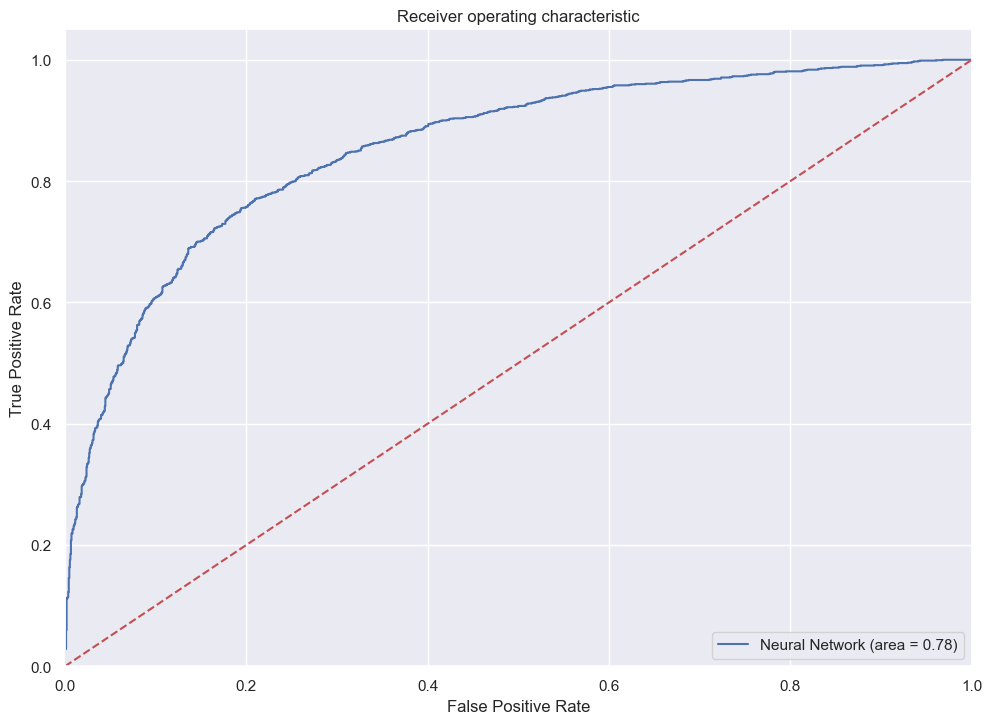

In [62]:
logit_roc_auc = roc_auc_score(y_test, clf_nn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_nn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

# SVM

In [64]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)
print('Accuracy of SVM on test set: {:.2f}'.format(clf_svm.score(X_test, y_test)))
confusion_matrix_print = confusion_matrix(y_test, y_pred_svm)
print(confusion_matrix_print)
print(classification_report(y_test, y_pred_svm))

Accuracy of SVM on test set: 0.71
[[1196  489]
 [ 418 1053]]
              precision    recall  f1-score   support

       False       0.74      0.71      0.73      1685
        True       0.68      0.72      0.70      1471

    accuracy                           0.71      3156
   macro avg       0.71      0.71      0.71      3156
weighted avg       0.71      0.71      0.71      3156



In [31]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)
print(loo)
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

LeaveOneOut()
Fold 0:
  Train: index=[1 2]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1]
  Test:  index=[2]


In [32]:
X[[1 2], :]

SyntaxError: invalid syntax (3786713851.py, line 1)

In [16]:
X[1 2]

SyntaxError: invalid syntax (3039656323.py, line 1)

In [4]:
loo.split(X)[1]

TypeError: 'generator' object is not subscriptable

In [10]:
import numpy as np
np.array([[1, 2], [3, 4], [3, 4]]).shape

(3, 2)

In [13]:
def maxMAE(X,y):
    from sklearn.model_selection import LeaveOneOut
    return 1

In [14]:
maxMAE(1,2)

1

In [33]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, random_state=1)

In [19]:
X

array([[-7.94152277e-01,  2.10495117e+00],
       [-9.15155186e+00, -4.81286449e+00],
       [-1.14418263e+01, -4.45781441e+00],
       [-9.76761777e+00, -3.19133737e+00],
       [-4.53655648e+00, -8.40186288e+00],
       [-6.26302115e+00, -8.10666081e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-9.20490564e+00, -4.57687928e+00],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-1.00364080e+01, -5.56912090e+00],
       [-9.87589123e+00, -2.82386464e+00],
       [-7.17532921e+00, -8.77059017e+00],
       [-2.40671820e+00,  6.09894447e+00],
       [-4.87418245e+00, -1.00495890e+01],
       [-6.07854700e+00, -7.93969420e+00],
       [-6.83238762e+00, -7.47067670e+00],
       [-2.34673261e+00,  3.56128423e+00],
       [-1.03415662e+01, -3.90975169e+00],
       [-1.10926243e+01, -3.78396611e+00],
       [-6.50212109e+00, -7.91249101e+00],
       [-1.02639310e+01, -3.92073400e+00],
       [-6.81608302e+00, -8.44986926e+00],
       [-1.

In [51]:
def maxMAE(X,y):
    from sklearn.model_selection import LeaveOneOut
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import mean_absolute_error
    loo = LeaveOneOut()
    max_err = 0
    for train_ix, test_ix in loo.split(X):
        print(train_ix)
        print(test_ix)
        X_train, X_test =  X[train_ix, :], X[test_ix, :]
        y_train, y_test = y[train_ix], y[test_ix]

        model = LogisticRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        curr_error = mean_absolute_error(y_test, y_pred)
        max_err = max(max_err, curr_error)
    return max_err

In [52]:
train_ix

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

In [53]:
test_ix

array([99])

In [54]:
X[test_ix,:]

array([[0.08525186, 3.64528297]])

In [50]:
maxMAE(X,y)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[0]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[1]
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[2]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[33]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[34]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[35]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[66]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[67]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
[68]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]
[99]


0

In [61]:
X[:,0:2]

array([[-7.94152277e-01,  2.10495117e+00],
       [-9.15155186e+00, -4.81286449e+00],
       [-1.14418263e+01, -4.45781441e+00],
       [-9.76761777e+00, -3.19133737e+00],
       [-4.53655648e+00, -8.40186288e+00],
       [-6.26302115e+00, -8.10666081e+00],
       [-6.38481234e+00, -8.47302970e+00],
       [-9.20490564e+00, -4.57687928e+00],
       [-2.76017908e+00,  5.55121358e+00],
       [-1.17104176e+00,  4.33091816e+00],
       [-1.00364080e+01, -5.56912090e+00],
       [-9.87589123e+00, -2.82386464e+00],
       [-7.17532921e+00, -8.77059017e+00],
       [-2.40671820e+00,  6.09894447e+00],
       [-4.87418245e+00, -1.00495890e+01],
       [-6.07854700e+00, -7.93969420e+00],
       [-6.83238762e+00, -7.47067670e+00],
       [-2.34673261e+00,  3.56128423e+00],
       [-1.03415662e+01, -3.90975169e+00],
       [-1.10926243e+01, -3.78396611e+00],
       [-6.50212109e+00, -7.91249101e+00],
       [-1.02639310e+01, -3.92073400e+00],
       [-6.81608302e+00, -8.44986926e+00],
       [-1.